<p><img alt="Colaboratory logo" height="50px" src="https://github.com/INGEOTEC/text_models/raw/master/docs/source/ingeotec.png" align="left" hspace="10px" vspace="0px" /></p>

# CompStats
## Quickstart Guide

### <http://compstats.readthedocs.org>



## Installing CompStats

In [1]:
# !python -m pip uninstall CompStats

In [2]:
# %pip install -U git+https://github.com/INGEOTEC/CompStats@origin/develop
%pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"
# %pip install -U git+https://github.com/INGEOTEC/CompStats@develop
# %pip install CompStats

Processing c:\users\sergio nava\documentos\github\ingeotec\compstats
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for CompStats: filename=CompStats-0.0.8-py3-none-any.whl size=26733 sha256=a1c31464ea8bc50ec8868ae163b59dc10de59dff625f832acb0bfe2629ec9df0
  Stored in directory: C:\Users\Sergio Nava\AppData\Local\Temp\pip-ephem-wheel-cache-a6erneig\wheels\19\3d\47\ac1dd586fda7dec78f516b825f8dc8d5f94f7a7b7820cd22b0
Successfully built CompStats
  Attempting uninstall: CompStats
    Found existing installation: CompStats 0.0.8
    Uninstalling CompStats-0.0.8:
      Successfully uninstalled CompStats-0.0.8
Note: you may need to restart the kernel to use updated packages.


First, we need to install CompStats. This can be quickly done through pip, the Python package manager.

In [3]:
try:
  import CompStats
except ImportError:
    %pip install "C:\Users\Sergio Nava\Documentos\GitHub\INGEOTEC\CompStats"

## Libraries

After installing `CompStats`, we must import the necessary libraries for our analysis. `CompStats` relies on several Python libraries for data analysis and scientific computing.

The first line of the following code loads two functions from the `CompStats` library. The `performance_multiple_metrics` function is used to calculate and analyze the performance of machine learning models for the multimetric case. On the other hand, the `plot_performance_multiple` function visualizes the performance metrics calculated by `performance_multiple_metrics`, such as accuracy or F1 score, along with confidence intervals to help understand the variability and reliability of the performance metrics.

The second line imports two functions: `difference_multiple` and `plot_difference_multiple`; `difference_multiple` assesses the differences in performance between models in comparison to the best system for each metric, and `plot_difference_multiple` visually represents these differences relative to the best system.

The third line imports two functions: `all_differences` and `difference_p_value`. `all_differences` evaluates the differences in performance between all models, and `difference_p_value` estimates the p-value of the hypothesis that the difference is significantly greater than zero.

The fourth line imports the function `multipletests`that is used for adjusting p-values when multiple hypothesis tests are performed, to control for the false discovery rate or family-wise error rate.

The rest of the lines load commonly used Python libraries.

In [4]:
from CompStats.performance import performance_multiple_metrics, plot_performance_multiple
from CompStats.performance import difference_multiple, plot_difference_multiple
from CompStats.performance import all_differences_multiple
from CompStats.measurements import difference_p_value
from statsmodels.stats.multitest import multipletests
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# la siguiente línea es para cargar el modulo measurements para calcular el CI 
from CompStats import measurements

# Dataset

Once we have set up our environment, we can explore what CompStats offers. Let's begin with a basic example of how to use CompStats for a simple statistical analysis.

To illustrate the use of CompStats, we will use a dataset included in the CompStats package. The path of the dataset is found with the following instructions. The variable `DATA` contains the path as shown below.  

In [5]:
# from CompStats.tests.test_performance import DATA
import os
DATA = "C:\\Users\\Sergio Nava\\Documentos\\GitHub\\INGEOTEC\\CompStats\\CompStats\\tests\\data.csv"

`DATA` contains the information to compare six systems for a multiclass classification task. The next instruction loads the data into a dataframe.

In [6]:
df = pd.read_csv(DATA)

The first five rows of `df` are shown below. It can be observed that the first column contains the gold standard, identified with `y`, and the rest of the columns are the predictions performed by different systems.

In [7]:
df.head()

,y,BoW (Corpus),BoW,INGEOTEC,BoW (Class Weight),Dense,StackBoW
0,0,2,2,2,2,2,2
1,6,6,6,6,6,5,6
2,7,5,5,5,5,5,5
3,5,4,4,4,4,5,4
4,4,7,5,4,6,6,6


# Performance Anaylisis

Let us start with the performance analysis of the different systems and various metrics. The performance metrics used are the weighted average F1 and precision scores, the accuracy score, and the mean absolute error. The metric selection is made for illustrative purposes.

The first three metrics mentioned are of the form "larger is better," while the last one is "smaller is better." This is achieved using the parameter BiB, which is set to 'True' for the first three metrics and 'False' for the last one.


In [8]:
metrics = [
    {"func": accuracy_score, 'BiB': True},
    {"func": f1_score, "args": {"average": "macro"}, 'BiB': True},
    {"func": precision_score, "args": {"average": "macro"}, 'BiB': True},
    {"func": mean_absolute_error, 'BiB': False}
    ]

The next step is to compute the performance on the bootstrap samples; this is done with the function `performance_multiple_metrics`. The function has a few parameters; one is the `metrics`, which receives the metrics used to measure the performance.

In [9]:
perf = performance_multiple_metrics(df, "y", metrics,num_samples=1000)

`perf` is a dictionary, the bootstrap samples can be seen on the key `samples`. The first five bootstrap samples of the accuracy score of INGEOTEC are shown below. -- It verifies that the key is in the dictionary in case the dataset has been changed. --

In [10]:
if 'INGEOTEC' in perf['samples']['accuracy_score'].keys():
    print(f"{perf['samples']['accuracy_score']['INGEOTEC'][:5]}")

[0.36329114 0.38037975 0.37341772 0.38797468 0.37911392]


The performance of the systems, along with their confidence intervals, can be seen using the next instruction.

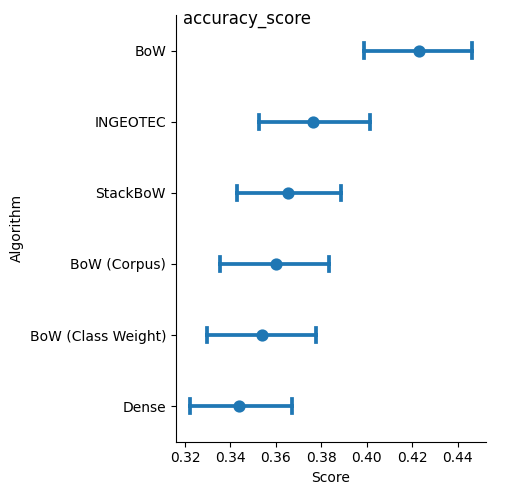

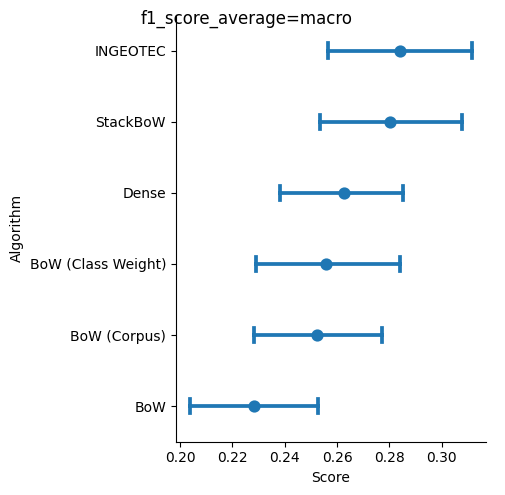

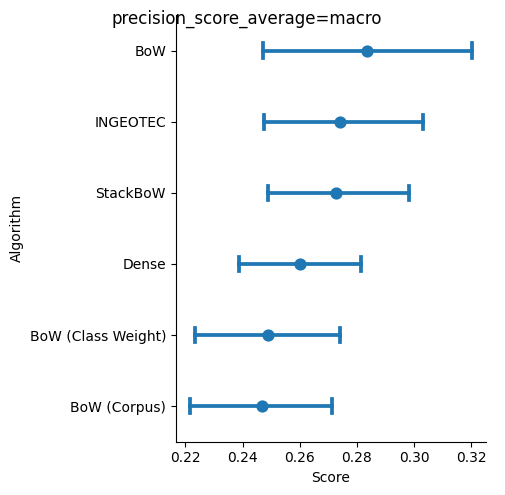

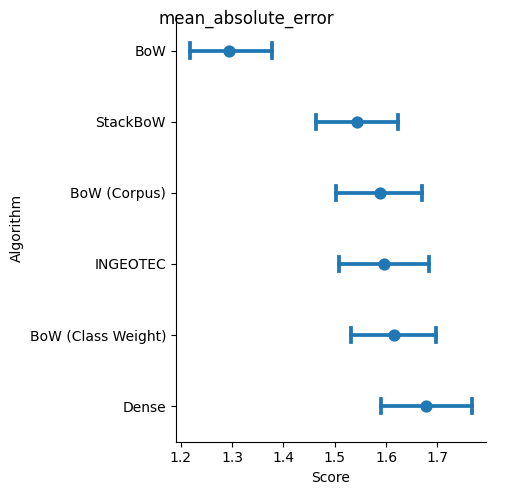

In [11]:
face_grid = plot_performance_multiple(perf)

It can be observed that the best system is different for each metric. Although the confidence intervals provide information that helps to assess the difference in the performance of the systems, in this case, the intervals intersect. Therefore, one needs another statistical tool to determine if the difference in performance is significant.

# Performance Comparison against the Winner

The difference in their performance compared to the best-performing system can be used to compare the algorithms analyzed. The function `difference` computes the difference as shown below.

In [12]:
diff = difference_multiple(perf) 

`diff` is a dictionary; one can find the best system on the key 'best' for each metric, as the following instruction shows.

In [13]:
for metric, diffs in diff['winner'].items():
    print(f"For {metric} the best performing system is {diffs['best']}")

For accuracy_score the best performing system is BoW
For f1_score_average=macro the best performing system is INGEOTEC
For precision_score_average=macro the best performing system is BoW
For mean_absolute_error the best performing system is BoW


CI for the difference against the winner.

In [14]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['CI'].items():
        print(f"CI for {key} {value}")



For the metric accuracy_score the best is BoW
CI for BoW (Corpus) (0.042405063291139244, 0.08292721518987341)
CI for INGEOTEC (0.023417721518987356, 0.06898734177215188)
CI for BoW (Class Weight) (0.04936708860759492, 0.088623417721519)
CI for Dense (0.051882911392405064, 0.10507911392405063)
CI for StackBoW (0.03354430379746837, 0.08102848101265825)

For the metric f1_score_average=macro the best is INGEOTEC
CI for BoW (Corpus) (0.0121593655589052, 0.052166123958642556)
CI for BoW (0.027699843135503017, 0.08556539561387382)
CI for BoW (Class Weight) (0.013693403022458398, 0.04323100135903909)
CI for Dense (-0.003442154581815053, 0.04396026414385391)
CI for StackBoW (-0.016393078903988133, 0.02229474726043551)

For the metric precision_score_average=macro the best is BoW
CI for BoW (Corpus) (0.005828161381636992, 0.06666147578172146)
CI for INGEOTEC (-0.02480207917000488, 0.04307539661194849)
CI for BoW (Class Weight) (0.004985625807365109, 0.06592940695521116)
CI for Dense (-0.011394

The difference in performance can be visualized with the following instruction.

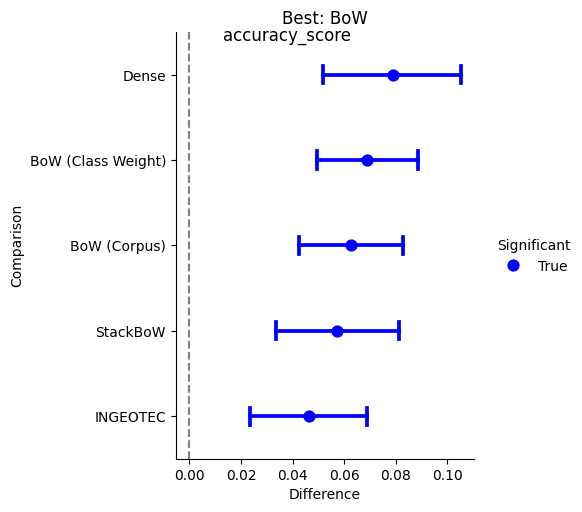

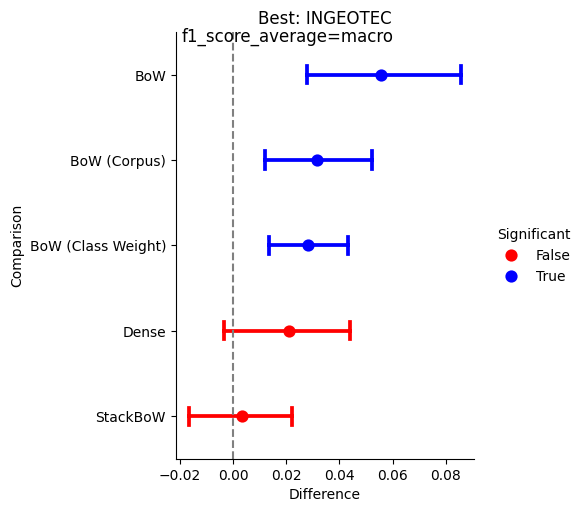

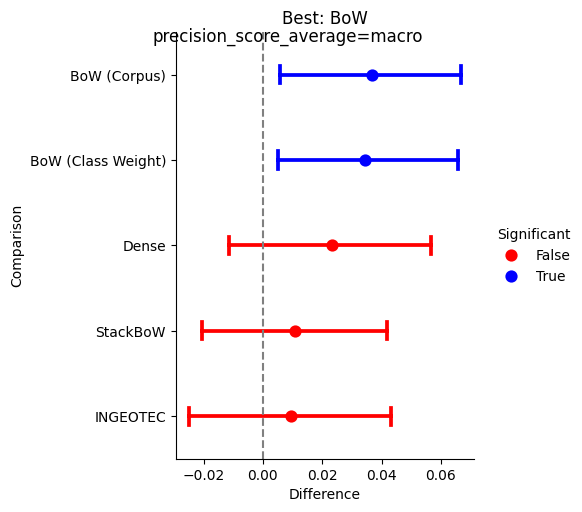

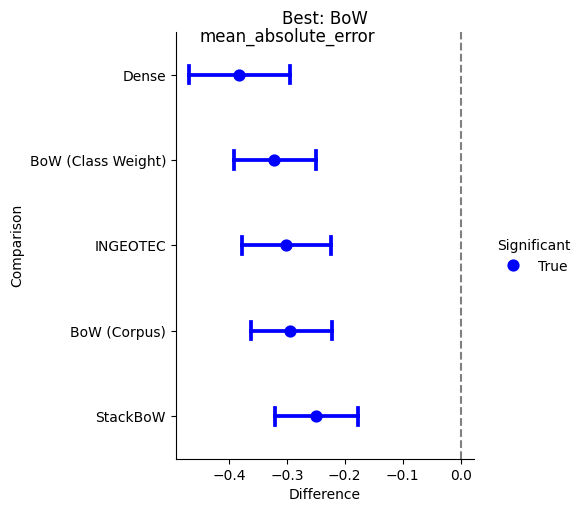

In [15]:
face_grid_diff = plot_difference_multiple(diff)

From the performance graphs, for this example, we can observe that the ranking is *INGEOTEC*, *BoW*, *StackBoW*, *BoW (Corpus)*, *Dense*, *Bow (Class Weight)*. Hence, in the last graph, we analyze the performance difference against the winner (INGEOTEC). From this graph, we can conclude that *BoW* and *StackBoW*, might perform similarly to INGEOTEC.

Should we test the hypothesis of equality versus difference, considering that one system outperforms the other in the test? To address this question, we compare the performance of two systems, $A$ and $B$, to determine whether $A$ is superior to $B$ in a larger data population, represented as $\theta_A > \theta_B$. We can estimate the p-value associated with the hypothesis test $H_0: \theta_A \le \theta_B$ vs $H_1: \theta_A > \theta_B$ given the data, equivalently $H_0: \theta_A< -  \theta_B\le 0$ vs $H_1: \theta_A - \theta_B > 0$. The p-values for these differences can be estimated using the following instruction, comparing them against the winner (INGEOTEC) to determine the probability that $a$ (INGEOTEC) is better than $b$.

The p-values for each difference, in comparison to the best system for each metric, are already calculated in 'diff'. These can be displayed as illustrated below. 

For a given $\alpha$ level, p-values smaller than $\alpha$  are significant, meaning the observed difference is unlikely to be due to chance. An $\alpha$ level of 0.05 is commonly used.


In [16]:
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference with {key} {value}")


For the metric accuracy_score the best is BoW
p-value for the difference with BoW (Corpus) 0.0
p-value for the difference with INGEOTEC 0.0
p-value for the difference with BoW (Class Weight) 0.0
p-value for the difference with Dense 0.0
p-value for the difference with StackBoW 0.0

For the metric f1_score_average=macro the best is INGEOTEC
p-value for the difference with BoW (Corpus) 0.002
p-value for the difference with BoW 0.0
p-value for the difference with BoW (Class Weight) 0.0
p-value for the difference with Dense 0.039
p-value for the difference with StackBoW 0.371

For the metric precision_score_average=macro the best is BoW
p-value for the difference with BoW (Corpus) 0.009
p-value for the difference with INGEOTEC 0.301
p-value for the difference with BoW (Class Weight) 0.02
p-value for the difference with Dense 0.101
p-value for the difference with StackBoW 0.249

For the metric mean_absolute_error the best is BoW
p-value for the difference with BoW (Corpus) 0.0
p-value for 

In [17]:
correction = 'bonferroni'
for metric, diffs in diff['winner'].items():
    print(f"\nFor the metric {metric} the best is {diffs['best']}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric accuracy_score the best is BoW
BoW (Corpus), p-value corrected by bonferroni = 0.0
INGEOTEC, p-value corrected by bonferroni = 0.0
BoW (Class Weight), p-value corrected by bonferroni = 0.0
Dense, p-value corrected by bonferroni = 0.0
StackBoW, p-value corrected by bonferroni = 0.0

For the metric f1_score_average=macro the best is INGEOTEC
BoW (Corpus), p-value corrected by bonferroni = 0.01
BoW, p-value corrected by bonferroni = 0.0
BoW (Class Weight), p-value corrected by bonferroni = 0.0
Dense, p-value corrected by bonferroni = 0.195
StackBoW, p-value corrected by bonferroni = 1.0

For the metric precision_score_average=macro the best is BoW
BoW (Corpus), p-value corrected by bonferroni = 0.045
INGEOTEC, p-value corrected by bonferroni = 1.0
BoW (Class Weight), p-value corrected by bonferroni = 0.1
Dense, p-value corrected by bonferroni = 0.505
StackBoW, p-value corrected by bonferroni = 1.0

For the metric mean_absolute_error the best is BoW
BoW (Corpus), p-value co

# Performance comparison between all models

Similarly, the differences for each pair of variables between all models can be estimated using the function `all_differences`, as illustrated in the following instructions. This approach allows for a comprehensive analysis of how each model compares to the others, providing a statistical basis to understand the significance of performance variations among them. This method extends the comparative analysis, offering a detailed view of the competitive landscape of model performance.

In [18]:
all_diff = all_differences_multiple(perf)


Once again, the p-values are already calculated. 

And we can analyze from all pairs of systems individually which ones have significantly different performances by comparing their p-value with $\alpha$.

In [19]:
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric} ")
    for key, value in diffs['p_value'].items():
        print(f"p-value for the difference {key} {value}")


For the metric accuracy_score 
p-value for the difference BoW vs INGEOTEC 0.0
p-value for the difference BoW vs StackBoW 0.0
p-value for the difference BoW vs BoW (Corpus) 0.0
p-value for the difference BoW vs BoW (Class Weight) 0.0
p-value for the difference BoW vs Dense 0.0
p-value for the difference INGEOTEC vs StackBoW 0.087
p-value for the difference INGEOTEC vs BoW (Corpus) 0.035
p-value for the difference INGEOTEC vs BoW (Class Weight) 0.006
p-value for the difference INGEOTEC vs Dense 0.003
p-value for the difference StackBoW vs BoW (Corpus) 0.249
p-value for the difference StackBoW vs BoW (Class Weight) 0.077
p-value for the difference StackBoW vs Dense 0.032
p-value for the difference BoW (Corpus) vs BoW (Class Weight) 0.155
p-value for the difference BoW (Corpus) vs Dense 0.087
p-value for the difference BoW (Class Weight) vs Dense 0.206

For the metric f1_score_average=macro 
p-value for the difference INGEOTEC vs StackBoW 0.371
p-value for the difference INGEOTEC vs Dense

When conducting numerous comparisons or hypothesis tests on a dataset, the risk of incurring Type I errors (incorrectly dismissing a valid null hypothesis) increases. This happens because more tests performed increase the probability of randomly identifying statistically significant outcomes. Implementing adjustments for multiple comparisons is critical for several reasons: (1) To manage the risk of Type I Error, (2) To prevent erroneous conclusions, and (3) To uphold the integrity of the research.

The following code illustrates the effect of these methods for multiple comparison corrections. The function `multipletests` makes the p-value correction by selecting the parameter `method`. In this example, the Bonferroni correction method is used.

In [20]:
correction = 'bonferroni'
for metric, diffs in all_diff['all'].items():
    print(f"\nFor the metric {metric}")
    result = multipletests(list(diffs['p_value'].values()), method=correction)
    p_valuesC = dict(zip(diffs['p_value'].keys(),result[1])) 
    for key, value in p_valuesC.items():
        print(f'{key}, p-value corrected by {correction} = {value}')


For the metric accuracy_score
BoW vs INGEOTEC, p-value corrected by bonferroni = 0.0
BoW vs StackBoW, p-value corrected by bonferroni = 0.0
BoW vs BoW (Corpus), p-value corrected by bonferroni = 0.0
BoW vs BoW (Class Weight), p-value corrected by bonferroni = 0.0
BoW vs Dense, p-value corrected by bonferroni = 0.0
INGEOTEC vs StackBoW, p-value corrected by bonferroni = 1.0
INGEOTEC vs BoW (Corpus), p-value corrected by bonferroni = 0.525
INGEOTEC vs BoW (Class Weight), p-value corrected by bonferroni = 0.09
INGEOTEC vs Dense, p-value corrected by bonferroni = 0.045
StackBoW vs BoW (Corpus), p-value corrected by bonferroni = 1.0
StackBoW vs BoW (Class Weight), p-value corrected by bonferroni = 1.0
StackBoW vs Dense, p-value corrected by bonferroni = 0.48
BoW (Corpus) vs BoW (Class Weight), p-value corrected by bonferroni = 1.0
BoW (Corpus) vs Dense, p-value corrected by bonferroni = 1.0
BoW (Class Weight) vs Dense, p-value corrected by bonferroni = 1.0

For the metric f1_score_average=

And we can analyze from all pairs of systems simunstally which ones have significantly different performances by comparing their p-value with $\alpha$.